In [1]:
import zipfile
import os

# Path to your ZIP file
zip_path = '/content/archive.zip'

# Destination folder to extract
extract_path = '/content'

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"ZIP file extracted to: {extract_path}")


ZIP file extracted to: /content


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [3]:
train_dir = "/content/train"  # Directory containing the training data
test_dir = "/content/validation"   # Directory containing the validation data

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range=0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip=True,         # Flip images horizontally at random
    rescale=1./255,               # Rescale pixel values to be between 0 and 1
    validation_split=0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,               # Rescale pixel values to be between 0 and 1
    validation_split=0.2          # Set aside 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,          # Directory containing the training data
    target_size=(48, 48),         # Resizes all images to 48x48 pixels
    batch_size=64,                # Number of images per batch
    color_mode="grayscale",       # Converts the images to grayscale
    class_mode="categorical",     # Classifies the images into 7 categories
    subset="training"             # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,           # Directory containing the validation data
    target_size=(48, 48),         # Resizes all images to 48x48 pixels
    batch_size=64,                # Number of images per batch
    color_mode="grayscale",       # Converts the images to grayscale
    class_mode="categorical",     # Classifies the images into 7 categories
    subset="validation"           # Uses the validation subset of the data
)

Found 23060 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # Save the best model during training
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=200,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

model.save('FER.keras')
print("Final model saved as 'FER.keras'")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1672 - loss: 2.9728
Epoch 1: val_accuracy improved from -inf to 0.23317, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.1672 - loss: 2.9724 - val_accuracy: 0.2332 - val_loss: 1.9249
Epoch 2/200
360/361 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2124 - loss: 2.4952
Epoch 2: val_accuracy improved from 0.23317 to 0.32388, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.2124 - loss: 2.4949 - val_accuracy: 0.3239 - val_loss: 1.7486
Epoch 3/200
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2438 - loss: 2.2742
Epoch 3: val_accuracy improved from 0.32388 to 0.34940, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.2438 - loss: 2.2741 - val_accuracy: 0.3494 - val_loss: 1.6618
Epoch 4/200
361/361 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2831 - loss: 2.1216
Epoch 4: val_accuracy impro

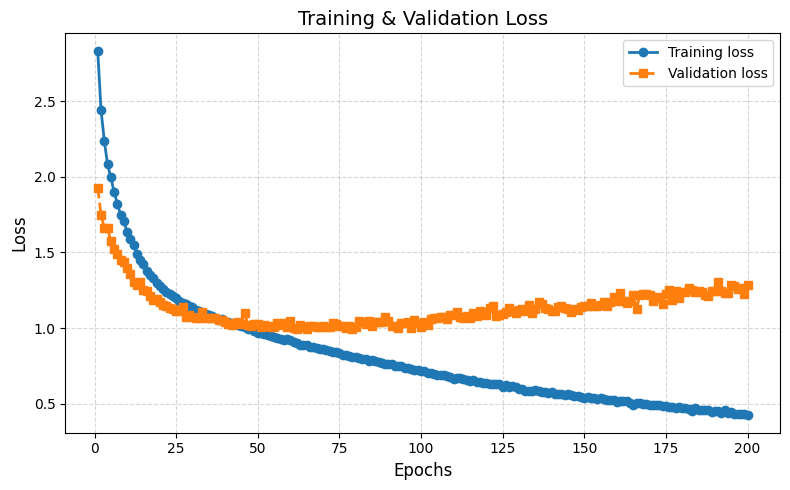

In [6]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss   = history.history['val_loss']
epochs     = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))

# Plot with distinct markers and line styles, default colors
plt.plot(epochs, train_loss, 'o-',  label='Training loss',   linewidth=2, markersize=6)
plt.plot(epochs, val_loss,   's--', label='Validation loss', linewidth=2, markersize=6)

# Title and axis labels with slightly larger font
plt.title('Training & Validation Loss', fontsize=14)
plt.xlabel('Epochs',               fontsize=12)
plt.ylabel('Loss',                 fontsize=12)

# Light grid for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Legend and tight layout
plt.legend()
plt.tight_layout()

plt.show()


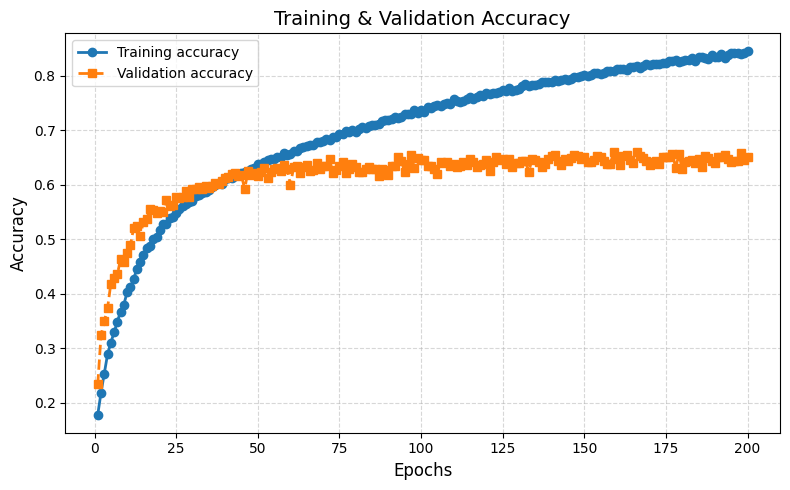

In [7]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']
epochs    = range(1, len(train_acc) + 1)

plt.figure(figsize=(8, 5))

# Distinct markers & line styles
plt.plot(epochs, train_acc, 'o-',  label='Training accuracy',   linewidth=2, markersize=6)
plt.plot(epochs, val_acc,   's--', label='Validation accuracy', linewidth=2, markersize=6)

# Title & labels with larger fonts
plt.title('Training & Validation Accuracy', fontsize=14)
plt.xlabel('Epochs',                  fontsize=12)
plt.ylabel('Accuracy',                fontsize=12)

# Light dashed grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend & tight layout
plt.legend()
plt.tight_layout()

plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


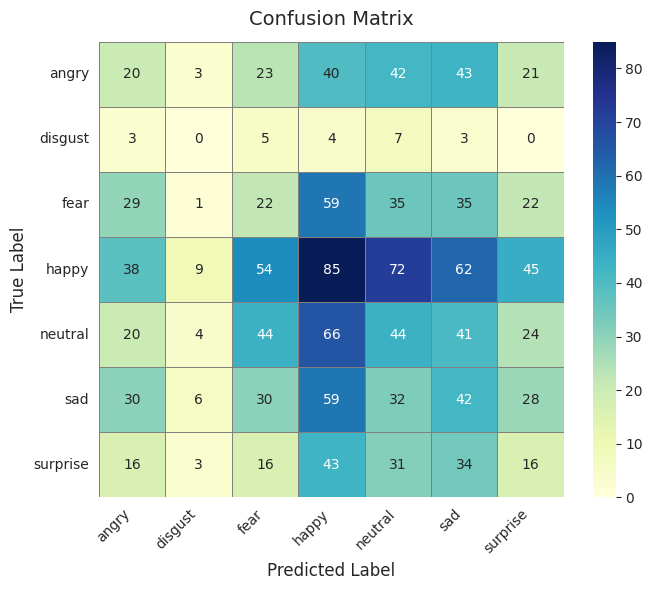

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gather true & predicted labels
y_true = validation_generator.classes
y_pred_probs = model.predict(validation_generator)
y_pred = y_pred_probs.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
classes = list(train_generator.class_indices.keys())

# Plot
plt.figure(figsize=(7, 6))
sns.set_style("whitegrid")

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    xticklabels=classes,
    yticklabels=classes
)

# Labels, title, and ticks
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label',      fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0,            fontsize=10)

plt.tight_layout()
plt.show()
